# 03 Exploratory Data Analysis (EDA)<a id='03_Exploratory_Data_Analysis (EDA)'></a>

## 3.1 Inferential Statistics<a id='3.1_Inferential Statistics'></a>
* [3.1.1 Sourcing and Loading](#3.1.1_Sourcing_and_Loading)
* [3.1.2 Cleaning, transforming and visualizing](#3.1.2_Cleaning,_transforming_and_visualizing)
* [3.1.3 Modeling](#3.1.3_Modeling) 

## 3.2 Data Visualization<a id='3.2_Data Visualization'></a>
* [3.2.1 Visualizing correlations](#3.2.1_Visualizing_correlations)
* [3.2.2 Fault Detection](#3.2.2_Faulte_Detection)

## 3.3 Linea Regression<a id='3.3_Linear Regression'></a>
* [3.3.1 Train/Test Split](#3.3.1_Visualizing_correlations)
* [3.3.2 Making a Linear Regression model](#3.3.2_Faulte_Detection)












## 3.1 Inferential Statistics
### 3.1.1 Sourcing and Loading

#### 3.1.1a Load the libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing

from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor

# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### 3.1.1b. Load the data

In [73]:
df1 = pd.read_csv('../data/mzvav_1_oaplus2_unfaulted.csv')
df2 = pd.read_csv('../data/mzvav_2_1_hcvleak_unfaulted.csv')
df3 = pd.read_csv('../data/mzvav_2_2_oadamperstuck_unfaulted.csv')
df4 = pd.read_csv('../data/mzvav_2_2_ccvstuck_unfaulted.csv')
df5 = pd.read_csv('../data/szcav_ccvleak_unfaulted.csv')
df6 = pd.read_csv('../data/szvav_hcvleak_unfaulted.csv')

#### 3.1.1c. Exploring the data

**(1) mzvav_1_oaplus2**

In [74]:
# Check out df_mzvav_1_oaplus2 appearance. 
df1.head()

,Unnamed: 0,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,20160,2017-02-13 00:00:00,68.00,55.04,35.60,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
1,20161,2017-02-13 00:01:00,67.99,55.04,35.60,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
2,20162,2017-02-13 00:02:00,67.99,55.04,-2.33,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
3,20163,2017-02-13 00:03:00,67.99,55.04,-2.28,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1
4,20164,2017-02-13 00:04:00,67.99,55.04,-2.23,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,1


In [75]:
stripped_name = [col.strip() for col in list(df1.columns)]
df1.rename(columns=dict(zip(list(df1.columns), stripped_name)), inplace=True)

In [76]:
df1.columns

Index(['Unnamed: 0', 'Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

In [77]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77760 entries, 0 to 77759
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      77760 non-null  int64  
 1   Datetime                                        77760 non-null  object 
 2   AHU: Supply Air Temperature                     77760 non-null  float64
 3   AHU: Supply Air Temperature Set Point           77760 non-null  float64
 4   AHU: Outdoor Air Temperature                    77760 non-null  float64
 5   AHU: Mixed Air Temperature                      77760 non-null  float64
 6   AHU: Return Air Temperature                     77760 non-null  float64
 7   AHU: Supply Air Fan Status                      77760 non-null  int64  
 8   AHU: Return Air Fan Status                      77760 non-null  int64  
 9   AHU: Supply Air Fan Speed Control Signa

In [78]:
df1.drop(df1.columns[[0,1,7,8]], axis=1, inplace=True)

**(2) mzvav_2_1_hcvleak**

**(3) mzvav_2_2_oadamperstuck**

**(4) mzvav_2_2_ccvstuck**

**(5) szcav_ccvleak**

**(6) szvav_hcvleak**

### 3.1.2 Cleaning, transforming and visualizing

#### 3.1.2a MZVAV_1_oaplus2

In [79]:
# The data of df1 (mzvav_1_oaplus2) looks clean. But the observations (rows) that 
# supply fan status is off shall be dropped off because AHUs are not in normal operation.
df1.drop(df1[ df1['Occupancy Mode Indicator'] == 0 ].index, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37920 entries, 361 to 75990
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AHU: Supply Air Temperature                     37920 non-null  float64
 1   AHU: Supply Air Temperature Set Point           37920 non-null  float64
 2   AHU: Outdoor Air Temperature                    37920 non-null  float64
 3   AHU: Mixed Air Temperature                      37920 non-null  float64
 4   AHU: Return Air Temperature                     37920 non-null  float64
 5   AHU: Supply Air Fan Speed Control Signal        37920 non-null  float64
 6   AHU: Return Air Fan Speed Control Signal        37920 non-null  float64
 7   AHU: Outdoor Air Damper Control Signal          37920 non-null  float64
 8   AHU: Return Air Damper Control Signal           37920 non-null  float64
 9   AHU: Cooling Coil Valve Control Signa

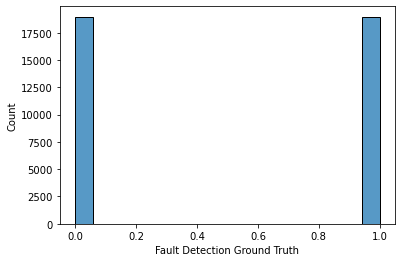

In [80]:
# Data are clean and concise. Plot the counts of fault and unfault cases
sns.histplot(data=df1['Fault Detection Ground Truth']);

In [81]:
# To summarize analytically, let's use the groupby() method on our df1.
df1.groupby(by = 'Fault Detection Ground Truth').mean()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator
Fault Detection Ground Truth,,,,,,,,,,,,,,
0,53.558426,55.04,51.335159,62.891224,72.495333,0.660570,0.660570,0.433717,0.000000,0.072674,0.000158,0.04,0.04,1.0
1,53.703969,55.04,54.935160,64.280188,72.675544,0.660326,0.660326,0.342027,0.000129,0.060590,0.000158,0.04,0.04,1.0


From the mean of OAT and OA damper control signal, the OA damper control signal in normal cases is significantly higher than those faulted cases (OAT senser is 2 degree F higher than the actual values of OAT). The mean of OAT in normal cases is 3.5 degrees lower than that in faulted cases. We'd like to do the regression of OA damper control signal vs OAT for normal and faulted cases to find the differences of OA damper control signals at the same OAT.

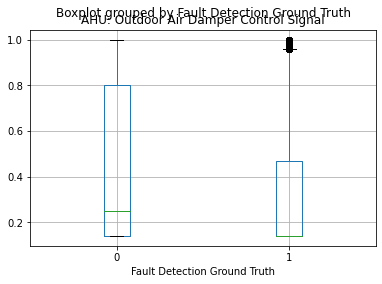

In [82]:
# Call the boxplot() method on our df1.
df1.boxplot(by = 'Fault Detection Ground Truth', column = 'AHU: Outdoor Air Damper Control Signal');

#### 3.1.2b MZVAV_2_1_hcvleak (do it later)
#### 3.1.2c MZVAV_2_2_oadamperstuck (do it later)
#### 3.1.2d MZVAV_2_2_ccvstuck (do it later)
#### 3.1.2e SZCAV_ccvleak (do it later)
#### 3.1.2f SZVAV_hcvleak (do it later)

### 3.1.3 Modeling

#### 3.1.3a MZVAV_1_oaplus2

3.1.3a.1 

Hypothesis formulation
Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean of OA Damper Control Signal between the normal cases and the faulted cases is due to chance (and thus not due to the fault - OA sersor sensing 2 degree F higher than the actual OAT).

The more interesting hypothesis is called the Alternate hypothesis:

**H<sub>alternative</sub>**: the observed difference in the mean of OA Damper Control Signal between the normal cases and the faulted cases is not due to chance (and is actually due to the fault - OA sersor sensing 2 degree F higher than the actual OAT)

We're also going to pick a significance level of 0.05.

3.1.3a.2

Getting the distribution of the data

Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept.

There are many different statistical tests, all with different assumptions. But in general, one of the most important things to determine is the distribution of the data.

In [83]:
# Create a subset of the column 'AHU: Outdoor Air Damper Control Signal' by the different cases (normal vs fault).
# Call the subsets 'normal1' and 'fault1' 
normal1 = df1[df1['Fault Detection Ground Truth'] == 0]['AHU: Outdoor Air Damper Control Signal']
fault1 = df1[df1['Fault Detection Ground Truth'] == 1]['AHU: Outdoor Air Damper Control Signal']

In [84]:
# Using the stats.normaltest() method, get an indication of whether the apple data are normally distributed
# Save the result in a variable called normal1_normal, and print it out
normal1_normal = stats.normaltest(normal1)
print(normal1_normal)

NormaltestResult(statistic=17823.856037569887, pvalue=0.0)


In [85]:
# Do the same with the fault1 data. 
fault1_normal = stats.normaltest(fault1)
print(fault1_normal)

NormaltestResult(statistic=3054.165036028114, pvalue=0.0)


Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal.

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed.

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics: - symmetric - unimodal (one hump) As well as a roughly identical mean, median and mode.

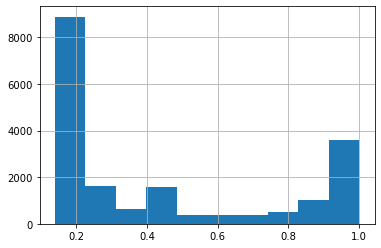

In [86]:
# Create a histogram of the normal1 reviews distribution
normal1.hist();

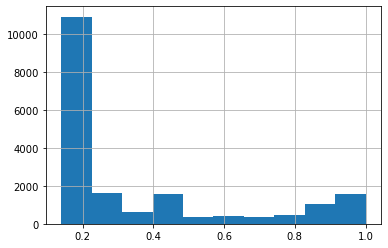

In [87]:
# Create a histogram of the google data
fault1.hist();

3.1.3a.3

Permutation test

Since the data aren't normally distributed, we're using a non-parametric test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.

In [88]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
# This assignment will use our numpy object's random.permutation() method
df1['Permutation1'] = np.random.permutation(df1.loc[:,'AHU: Outdoor Air Damper Control Signal'])

# Call the describe() method on our permutation grouped by 'platform'. 
df1.groupby('Fault Detection Ground Truth')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Fault Detection Ground Truth,,,,,,,,
0,18960.0,0.389309,0.322526,0.14,0.14,0.21,0.61,1.0
1,18960.0,0.386436,0.319050,0.14,0.14,0.21,0.60,1.0


In [89]:
# Lets compare with the previous analytical summary:
df1.groupby('Fault Detection Ground Truth')['AHU: Outdoor Air Damper Control Signal'].describe()

,count,mean,std,min,25%,50%,75%,max
Fault Detection Ground Truth,,,,,,,,
0,18960.0,0.433717,0.342794,0.14,0.14,0.25,0.800000,1.0
1,18960.0,0.342027,0.290015,0.14,0.14,0.14,0.467173,1.0


In [90]:
# The difference in the means for Permutation1 (0.0000625) now looks hugely different to our observed difference of 0.066546. 
# It's sure starting to look like our observed difference is significant, and that the Null is false; the fault (oatplus2) does impact on OA damper position
# But to be sure, let's create 10,000 permutations, calculate the mean ratings for normal1 and fault1 and the difference between these for each one, and then take the average of all of these differences.
# Let's create a vector with the differences - that will be the distibution of the Null.

# First, make a list called difference.
difference =[]

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    permutation = np.random.permutation(df1.loc[:,'AHU: Outdoor Air Damper Control Signal'])
    difference.append(np.mean(permutation[df1['Fault Detection Ground Truth'] == 0]) - np.mean(permutation[df1['Fault Detection Ground Truth'] == 1]))

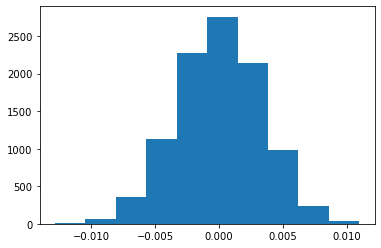

In [91]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo = plt.hist(difference)

In [92]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'normal1' variable and the mean of our 'fault1' variable
obs_difference = np.mean(df1[df1['Fault Detection Ground Truth'] == 0]['AHU: Outdoor Air Damper Control Signal']) - np.mean(df1[df1['Fault Detection Ground Truth'] == 1]['AHU: Outdoor Air Damper Control Signal'])

# Make this difference absolute with the built-in abs() function. 
obs_difference = abs(obs_difference)

# Print out this value; it should be 0.09169. 
print(obs_difference)

0.09169021508456465


In [93]:
'''
What do we know? 
Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.
As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference.
If less than or equal to 5% of them are, then we will reject the Null. 
'''
# check how many of the differences are at least as extreme as (95%) our observed differenc
sum([(diff - obs_difference) > 0 for diff in difference]) / len(difference)

0.0

So actually, zero differences are at least as extreme as our observed difference!
So the p-value of our observed data is 0.
It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the **H<sub>Null</sub>** and accept **H<sub>Alternatative</sub>**.
We conclude that the fault1 does impact on OA damper control signal.

#### 3.1.3b MZVAV_2_1_hcvleak (do it later)
#### 3.1.3c MZVAV_2_2_oadamperstuck (do it later)
#### 3.1.3d MZVAV_2_2_ccvstuck (do it later)
#### 3.1.3e SZCAV_ccvleak (do it later)
#### 3.1.3f SZVAV_hcvleak (do it later)

# 3.2 Data visualization
## 3.2.1 Visualizing correlations

#### 3.2.1a MZVAV_1_oaplus2
After the permutation test, the column of 'Permutation1' in df1 will be dropped for better visualizing correlations

In [94]:
df1.drop('Permutation1', axis=1, inplace=True)

In [95]:
df1.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,37920.000000,3.792000e+04,37920.000000,37920.000000,37920.000000,37920.000000,37920.000000,37920.000000,37920.000000,37920.000000,37920.000000,3.792000e+04,3.792000e+04,37920.0,37920.000000
mean,53.631198,5.504000e+01,53.135160,63.585706,72.585439,0.660448,0.660448,0.387872,0.000065,0.066632,0.000158,4.000000e-02,4.000000e-02,1.0,0.500000
std,1.569141,2.559409e-11,20.689143,8.990205,1.870078,0.029614,0.029614,0.320792,0.012581,0.093680,0.012578,2.108758e-14,2.108758e-14,0.0,0.500007
min,47.350000,5.504000e+01,-7.060000,22.610000,55.090000,0.630000,0.630000,0.140000,0.000000,0.010000,0.000000,4.000000e-02,4.000000e-02,1.0,0.000000
25%,52.170000,5.504000e+01,38.957500,55.050000,71.100000,0.640000,0.640000,0.140000,0.000000,0.010000,0.000000,4.000000e-02,4.000000e-02,1.0,0.000000
50%,53.980000,5.504000e+01,58.640000,57.100000,72.450000,0.650000,0.650000,0.210000,0.000000,0.030000,0.000000,4.000000e-02,4.000000e-02,1.0,0.500000
75%,55.050000,5.504000e+01,67.600000,72.660000,74.370000,0.670000,0.670000,0.610000,0.000000,0.070000,0.000000,4.000000e-02,4.000000e-02,1.0,1.000000
max,56.770000,5.504000e+01,86.540000,76.740000,87.480000,0.770000,0.770000,1.000000,2.450000,0.490000,1.000000,4.000000e-02,4.000000e-02,1.0,1.000000


In [96]:
# We can call the .corr() method on our df1 data to look at all the correlations between our variables
corrmat = df1.corr()

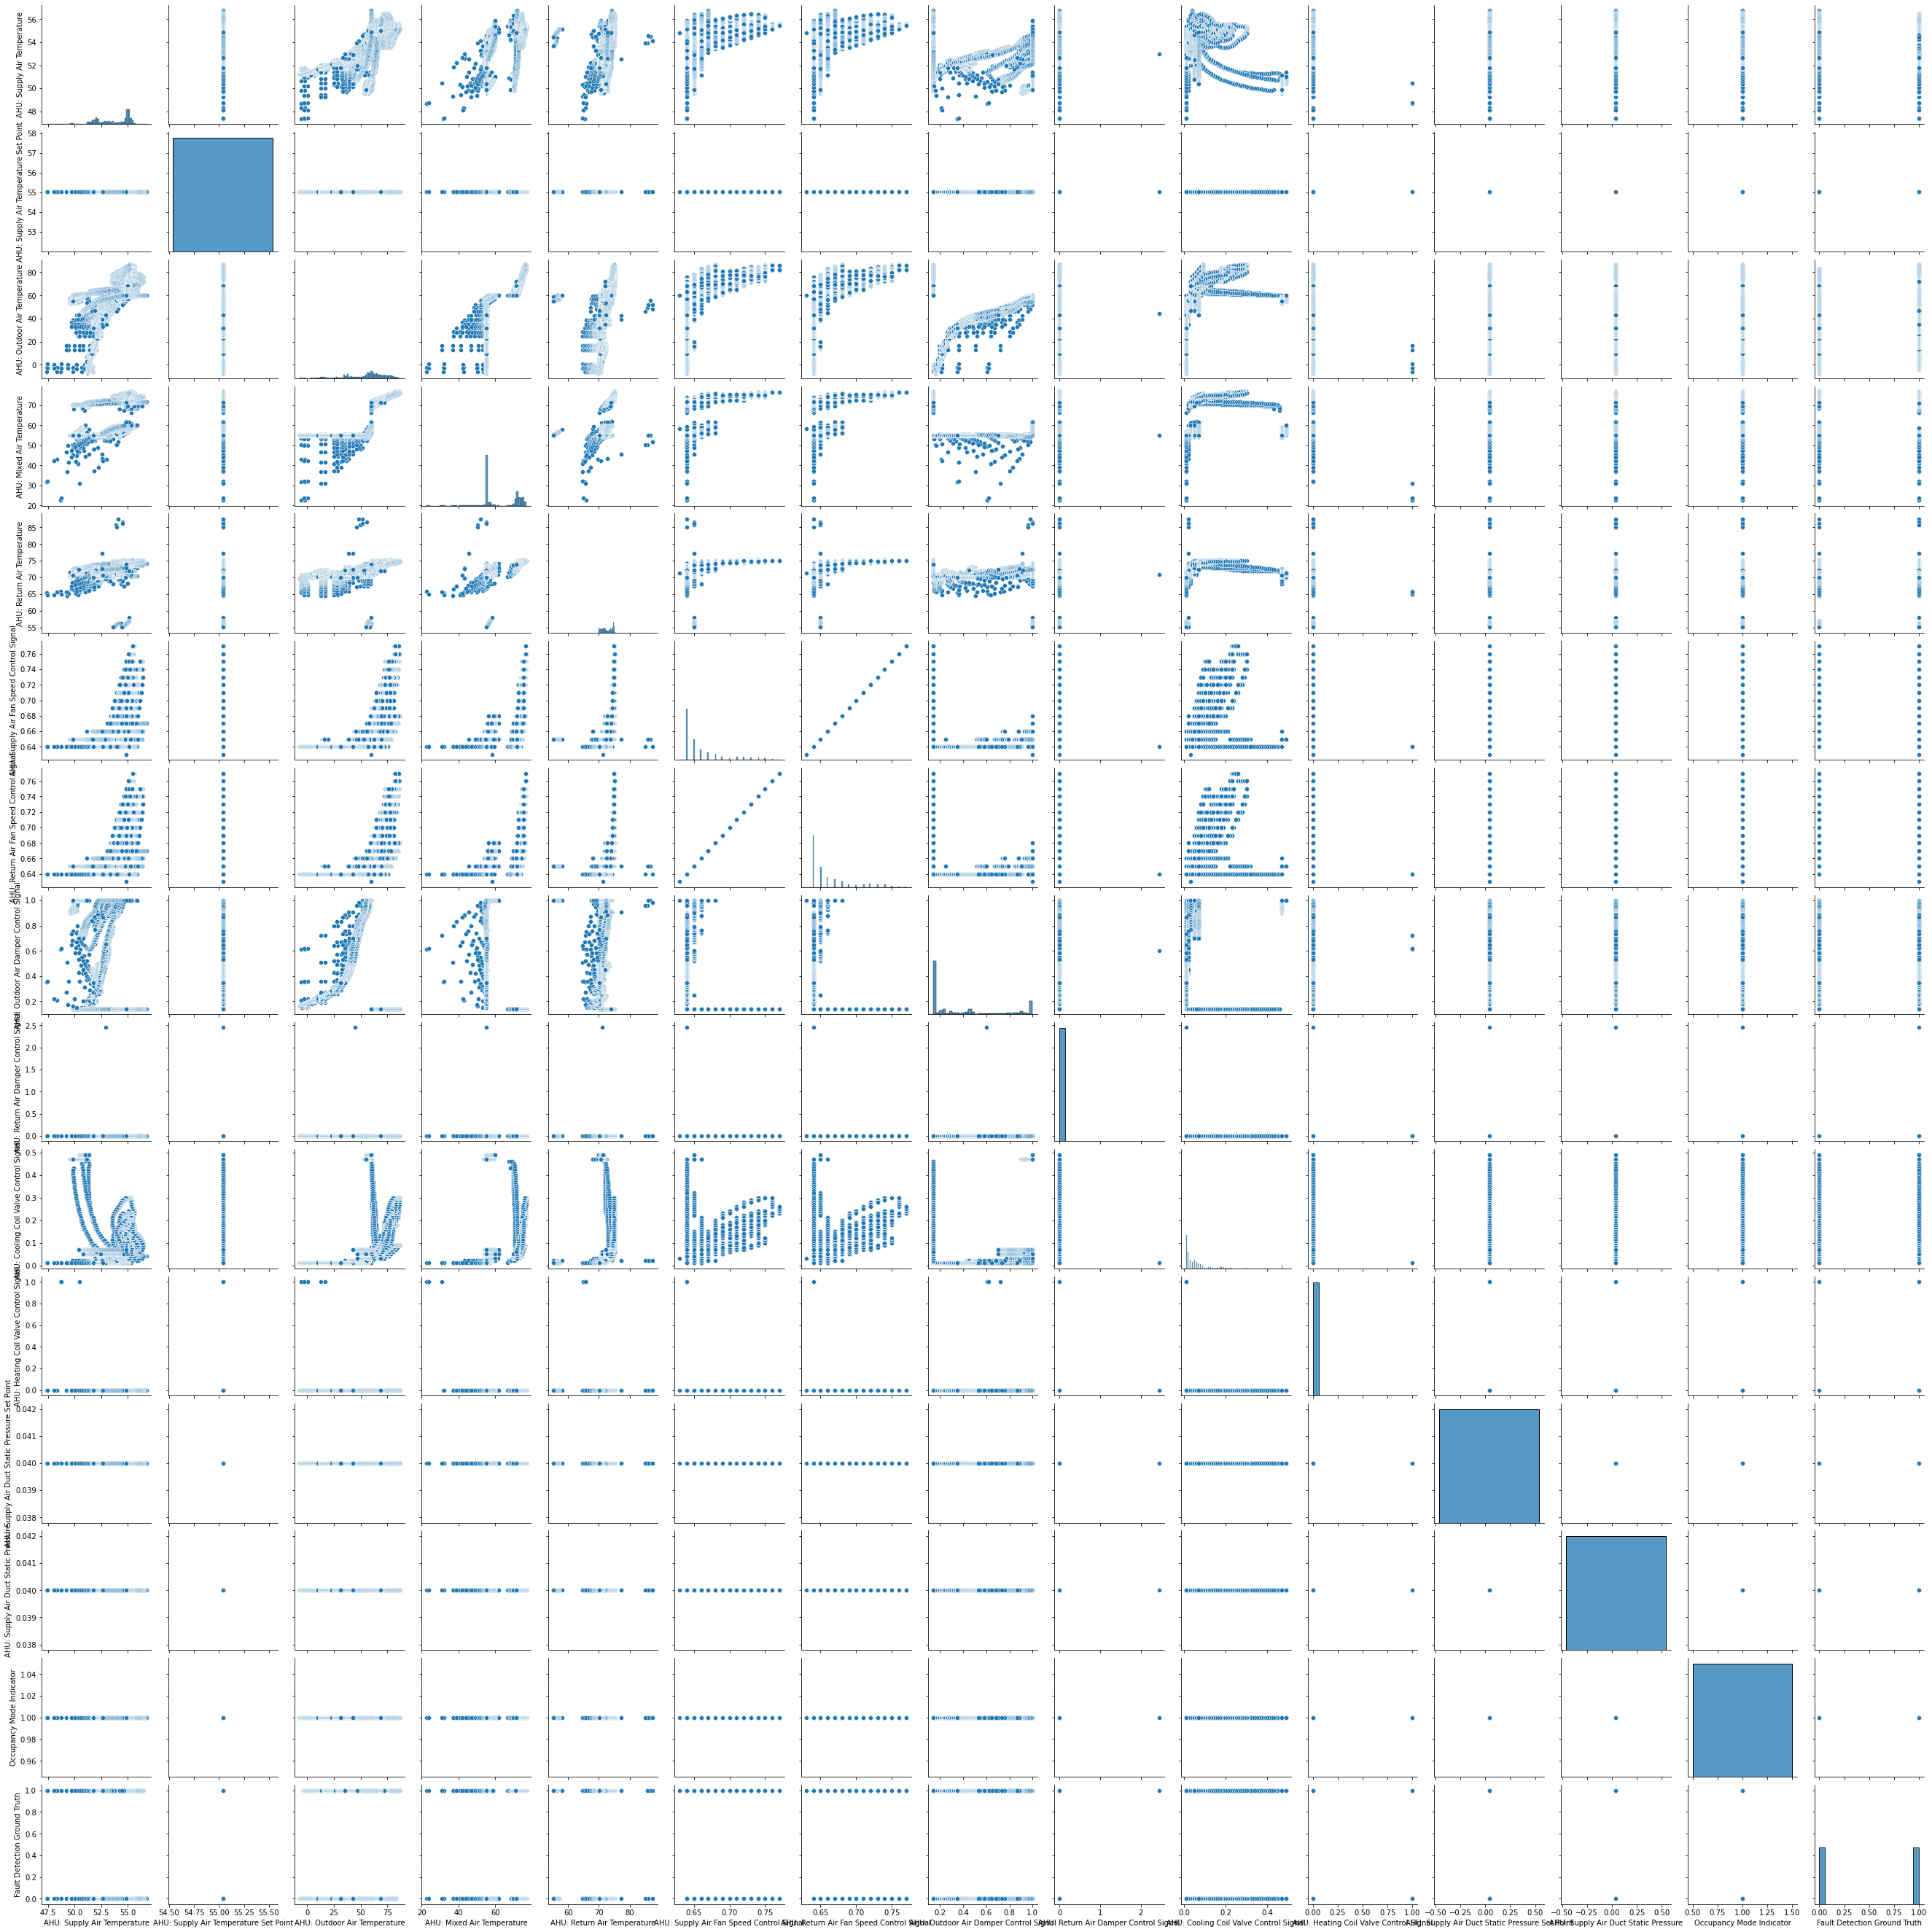

In [97]:
# Make a pairplot of the df1 data to visualize
sns.pairplot(df1)

There are four variables (SA tempererature setpoint, SA static pressure set point, SA static pressure, occupancy mode indicator) that they are constant. So there are four constant values shown in the pairplot charts indicating those four variables are constants. 

We can also show the relations with heatmap.

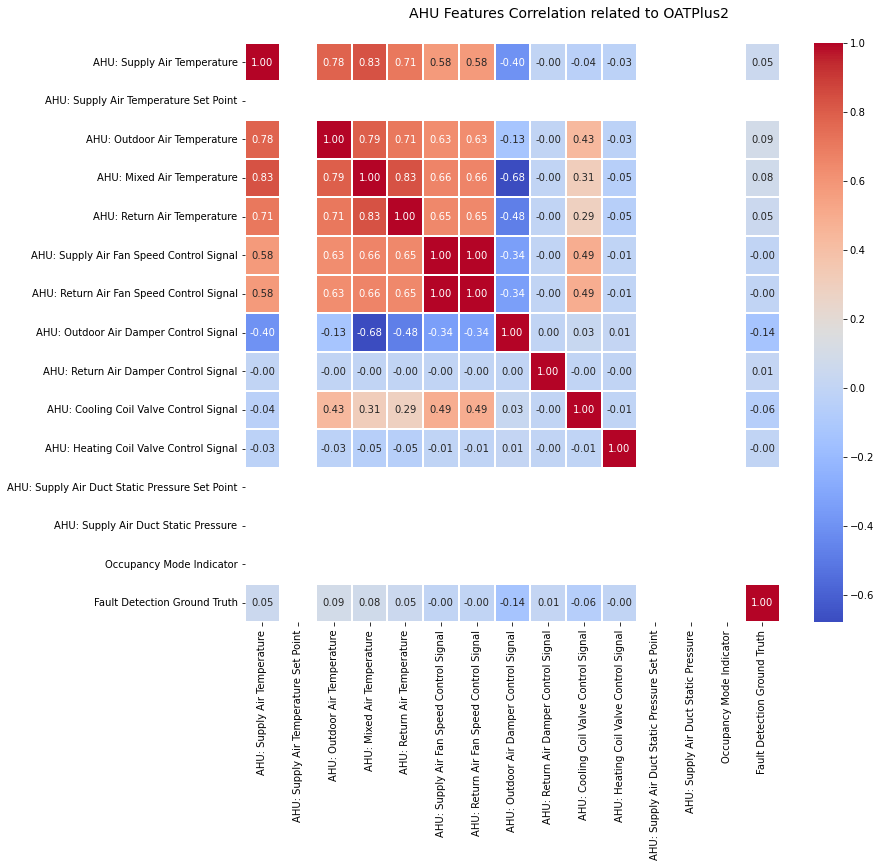

In [98]:
# Make a heatmap of the data 
f, ax = plt.subplots(figsize=(12,10))
hm = sns.heatmap(round(corrmat, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('AHU Features Correlation related to OATPlus2', fontsize=14)

#### 3.2.1b MZVAV_2_1_hcvleak (do it later)
#### 3.2.1c MZVAV_2_2_oadamperstuck (do it later)
#### 3.2.1d MZVAV_2_2_ccvstuck (do it later)
#### 3.2.1e SZCAV_ccvleak (do it later)
#### 3.2.1f SZVAV_hcvleak (do it later)

### 3.2.2 Fault Detection

#### 3.2.2a MZVAV_1_oaplus2

Fault detection is relatively strongly related with the variables below 
1. OA damper control signal (-0.14)
2. OA temperature (0.09)
3. Mixed air temperature (0.08)
4. Cooling coil valve control signal (-0.06)
5. Return air temperature (0.05)
6. Supply air temperature (0.05)

From the domain knowledge, OA damper control signal was computed based on OA temperature, RA temperature and mixed air temp set point. From the OA damper control strategy diagram below, the OA damper control signal (position) are closely related with OA temperature. There are minimum damper position when OAT is higher than **T<sub>r</sub>** and lower than **T<sub>c</sub>**. Between **T<sub>s</sub>** and **T<sub>r</sub>**, it is free cooling with OA damper fully open and additional mechanical cooling. Between **T<sub>c</sub>** and **T<sub>s</sub>**, it is free cooling with OA damper partialy open without mechanical cooling.

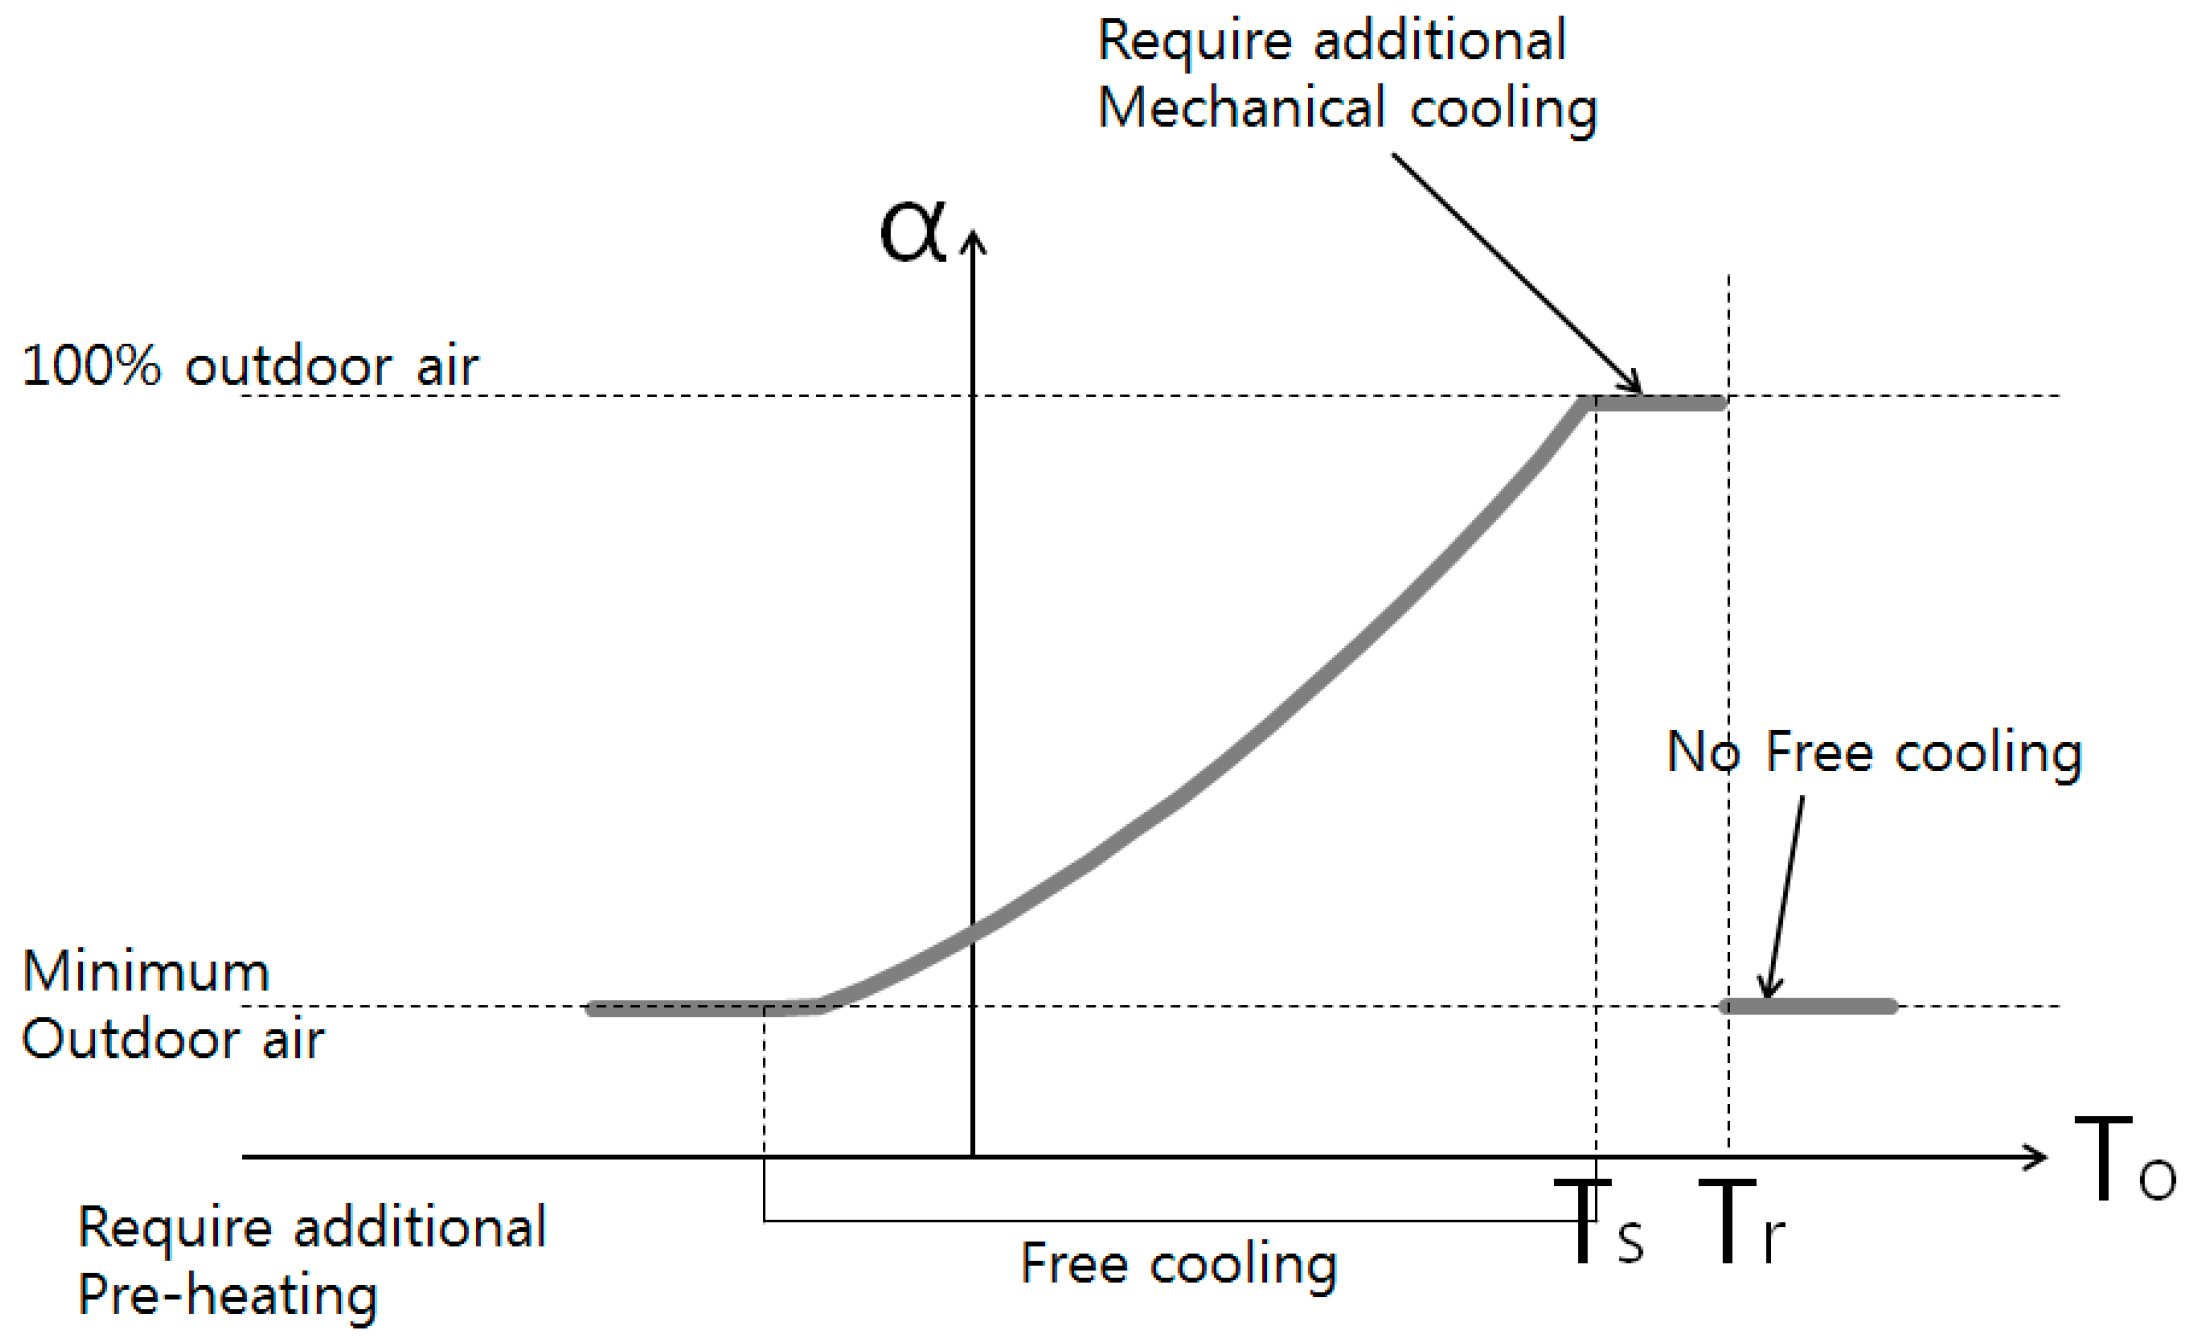

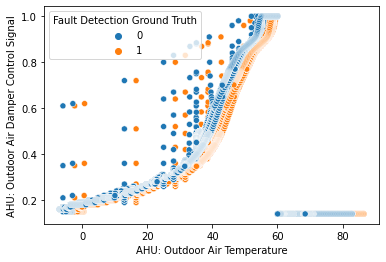

In [99]:
# Plot OAT against OA damper control signal for normal (Fault Detecton 0) and fault (Fault Detection 1) modes
sns.scatterplot(x='AHU: Outdoor Air Temperature', y='AHU: Outdoor Air Damper Control Signal', data=df1, hue=df1.loc[:, 'Fault Detection Ground Truth']);

Except some points at the normal and fault modes during the phase of free cooling with OAD partially open, OA damper position (control signal) follow the control strategy of OA damper with OA temperature. The OA damper control signals just shift about 2 degree F of OA temperature in the fault mode than those in the normal mode. It indicates the OA temperature sensor are offset about 2 degree F than the actual values. 

#### 3.2.2b MZVAV_2_1_hcvleak (do it later)
#### 3.2.2c MZVAV_2_2_oadamperstuck (do it later)
#### 3.2.2d MZVAV_2_2_ccvstuck (do it later)
#### 3.2.2e SZCAV_ccvleak (do it later)
#### 3.2.2f SZVAV_hcvleak (do it later)

## 3.3 Linear Regression

### 3.3.1 Train/Test Split
#### 3.3.1a MZVAV_1_oaplus2

To be sure, for our first model, we're only going to focus on two variables: AHU: Outdoor Air Damper Control Signal as our dependent variable, and AHU: Outdoor Air Temperature as our sole independent predictor variable.

In [100]:
# Subsetting our data into our dependent and independent variables.
X = df1[["AHU: Outdoor Air Temperature"]]
y = df1[["AHU: Outdoor Air Damper Control Signal"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [101]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(28440, 1) (28440, 1)
(9480, 1) (9480, 1)


#### 3.3.1b MZVAV_2_1_hcvleak (do it later)
#### 3.3.1c MZVAV_2_2_oadamperstuck (do it later)
#### 3.3.1d MZVAV_2_2_ccvstuck (do it later)
#### 3.3.1e SZCAV_ccvleak (do it later)
#### 3.3.1f SZVAV_hcvleak (do it later)

## 3.3.2 Making a Linear Regression model
#### 3.3.2a MZVAV_1_oaplus2

From the OA damper control diagram, the OA damper control signal shall be piecewise linear regression with OA temperature. Sklearn has a PiecewiseRegressor() function built into the linear_model module. We'll be using that to make our regression model.

rModel = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=300))
rModel.fit(X_train, y_train)

In [102]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=4000))

# We now want to train the model on our test data. PiecewiseRegressor
X_train_arr = X_train.to_numpy()
y_train_arr = y_train.to_numpy()
rModel.fit(X_train_arr, y_train_arr)

# Evaluate the model
print(rModel.score(X_train_arr, y_train_arr))

0.9897192149605042


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [103]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

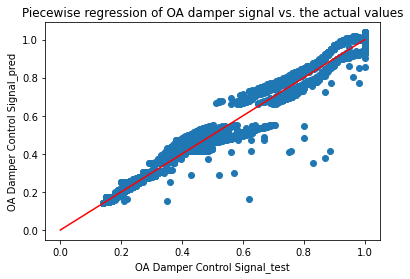

In [104]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_pred);

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0, 2)], [x for x in range(0, 2)], color='red')

# Label it nicely
plt.title("Piecewise regression of OA damper signal vs. the actual values")
plt.xlabel("OA Damper Control Signal_test")
plt.ylabel("OA Damper Control Signal_pred")
plt.show()

#### 3.3.2b MZVAV_2_1_hcvleak (do it later)
#### 3.3.2c MZVAV_2_2_oadamperstuck (do it later)
#### 3.3.2d MZVAV_2_2_ccvstuck (do it later)
#### 3.3.2e SZCAV_ccvleak (do it later)
#### 3.3.2f SZVAV_hcvleak (do it later)